# Проверка гипотез по увеличению выручки в интернет-магазине. Оценка результатов A/B теста

# Введение

## Описание проекта

**Я являюсь аналитиком крупного интернет-магазина. Вместе с отделом маркетинга был подготовлен список гипотез для увеличения выручки. Приоритизируем гипотезы, запустим A/B-тест и проанализируем результаты.**


**Задачи:**
1. Приоритезировать гипотезы
2. Проанализировать А/В тест
3. Написать выводы по А/В тесту

## Описание данных

**Данные для первой части:** 
1. Файл hypothesis.csv: 

- Hypothesis — краткое описание гипотезы;
- Reach — охват пользователей по 10-балльной шкале;
- Impact — влияние на пользователей по 10-балльной шкале;
- Confidence — уверенность в гипотезе по 10-балльной шкале;
- Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. 

**Данные для второй части:** 
1. Файл orders.csv:

- transactionId — идентификатор заказа;
- visitorId — идентификатор пользователя, совершившего заказ;
- date — дата, когда был совершён заказ;
- revenue — выручка заказа;
- group — группа A/B-теста, в которую попал заказ.

2. Файл visitors.csv:

- date — дата;
- group — группа A/B-теста;
- visitors — количество пользователей в указанную дату в указанной группе A/B-теста

## Приоритизация гипотез

In [1]:
#импорт библиотек
import pandas as pd
import scipy.stats as stats
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('/datasets/hypothesis.csv', sep=',')

In [3]:
#изучим данные
display(data.head())
data.info()
print(f"Дубликаты в данных: {data.duplicated().sum()}")
print('*'*30)
print(f"Пропуски в данных: {data.isna().sum()}")

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes
Дубликаты в данных: 0
******************************
Пропуски в данных: Hypothesis    0
Reach         0
Impact        0
Confidence    0
Efforts       0
dtype: int64


In [4]:
#приведем названия к нижнему регистру
data.columns = data.columns.str.lower()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   hypothesis  9 non-null      object
 1   reach       9 non-null      int64 
 2   impact      9 non-null      int64 
 3   confidence  9 non-null      int64 
 4   efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


### Применим фреймворк ICE для приоритизации гипотез (по убыванию приоритета)

In [5]:
pd.set_option('max_colwidth', 200)
#расчет ICE
data['ICE'] = round ((data['impact']*data['confidence'])/data['efforts'], 3) 
#сортируем по убыванию приоритета
data[['hypothesis','ICE']].sort_values(by='ICE', ascending=False) 

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000


### Применим фреймворк RICE для приоритизации гипотез(по убыванию приоритета)

In [6]:
#расчет RICE
data['RICE'] = round (data['reach']*data['impact']*data['confidence']/data['efforts'], 3) 
#сортируем по убыванию приоритета
data[['hypothesis','RICE']].sort_values(by='RICE', ascending=False) 

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


### Итоги приоритизации

ПО ICE:
Гипотезы 8, 0, 7
ПО RICE:
Гипотезы 7, 2, 0

Из-за добавления показателя "Reach" приоритизация по RICE изменилась. Получается, что у перспективных гипотез по RICE (7,2,0) охват пользователей высок, что и позволило данным гипотезам выбиться на первые места по рейтингу.

**По итогу выбираем гипотезы:0, 7, 6.** По поводу 8 и 2 гипотез все неоднозначно, в одном фреймворке они перспективны, однако в другом - нет. Поэтому третей гипотезой возьмем №6, ведь в обоих фреймворках она на 4 месте.

## Анализ A/B-теста

### Предобработка данных

In [7]:
orders = pd.read_csv('/datasets/orders.csv', sep=',')
visitors = pd.read_csv('/datasets/visitors.csv', sep=',')

In [8]:
display(orders.head())
orders.info()
print(f"Дубликаты в данных: {orders.duplicated().sum()}")
print('*'*30)
print(f"Пропуски в данных: {orders.isna().sum()}")

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB
Дубликаты в данных: 0
******************************
Пропуски в данных: transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64


In [9]:
display(visitors.head())
visitors.info()
print(f"Дубликаты в данных: {visitors.duplicated().sum()}")
print('*'*30)
print(f"Пропуски в данных:       {visitors.isna().sum()}")

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB
Дубликаты в данных: 0
******************************
Пропуски в данных:       date        0
group       0
visitors    0
dtype: int64


In [10]:
#приводим необходимые столбцы к формату даты
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [11]:
#проверим дублирующихся людей
both_group = orders.groupby(['visitorId']).agg({'group' : 'nunique', 'transactionId' : 'count', 'revenue' : 'sum'}).reset_index()
print(f'Пользователи, попавшие в две группы: {both_group[both_group.group != 1]["visitorId"].count()}')
print(f"Сумма их заказов {both_group[both_group.group != 1]['revenue'].sum()}")
print(f"Количество их заказов {both_group[both_group.group != 1]['transactionId'].sum()}")

Пользователи, попавшие в две группы: 58
Сумма их заказов 1558935
Количество их заказов 181


Следует исключить пользователей, которые попали в обе группы одновременно, поскольку это исказит результаты исследования. 
У нас имеется 58 таких человек, с суммой заказов - 1558935 и количеством заказов - 181.

In [12]:
#убираем людей, которые в двух группах одновременно
both_list = list(both_group[both_group.group != 1]['visitorId'])
orders_new = orders.query('visitorId not in @both_list')

### График кумулятивной выручки по группам

In [13]:
#агрегированные кумулятивные данные
ordersAggregated = orders_new.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 'visitorId' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])
visitorsAggregated = orders_new.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])
#объединяем 
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
print(cumulativeData.head(5))

        date group  orders  buyers  revenue  visitors
0 2019-08-01     A      24      20   148579       719
1 2019-08-01     A      24      20   148579       719
2 2019-08-01     A      24      20   148579       719
3 2019-08-01     A      24      20   148579       719
4 2019-08-01     A      24      20   148579       719


In [14]:
# Проверка минимальной и максимальной дат в cumulativeData
min_date_cumulative = cumulativeData['date'].min()
max_date_cumulative = cumulativeData['date'].max()


min_date_agg = ordersAggregated['date'].min()
max_date_agg = ordersAggregated['date'].max()

min_date_original = orders['date'].min()
max_date_original = orders['date'].max()
print(f"Минимальная дата в cumulativeData: {min_date_cumulative}")
print(f"Максимальная дата в cumulativeData: {max_date_cumulative}")
print('*'*50)
print(f"Минимальная дата в исходных данных: {min_date_original}")
print(f"Максимальная дата в исходных данных: {max_date_original}")
print('*'*50)
print(f"Минимальная дата в агрегированных данных: {min_date_agg}")
print(f"Максимальная дата в агрегированных данных: {max_date_agg}")

Минимальная дата в cumulativeData: 2019-08-01 00:00:00
Максимальная дата в cumulativeData: 2019-08-31 00:00:00
**************************************************
Минимальная дата в исходных данных: 2019-08-01 00:00:00
Максимальная дата в исходных данных: 2019-08-31 00:00:00
**************************************************
Минимальная дата в агрегированных данных: 2019-08-01 00:00:00
Максимальная дата в агрегированных данных: 2019-08-31 00:00:00


Минимальная и максимальная даты везде совпадают, а значит, агрегирование и объединение прошло успешно

In [15]:
# датафрейм по группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм по группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

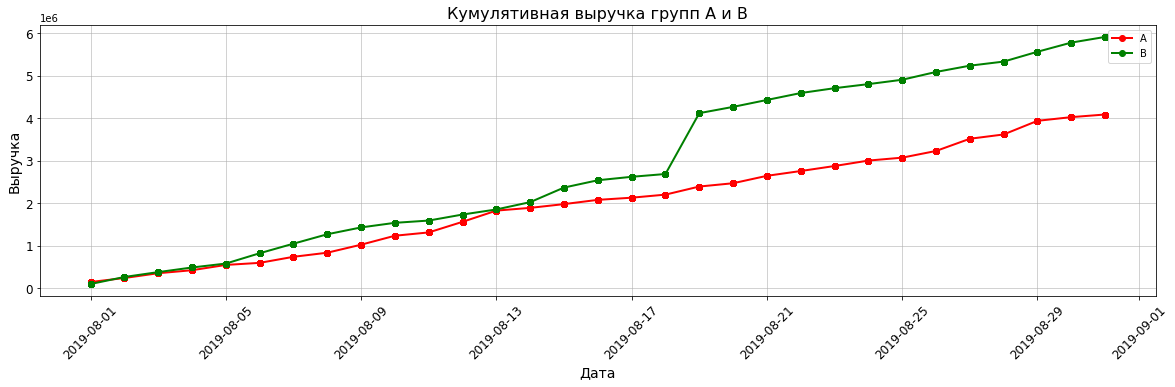

In [49]:
cumulativeRevenueA = cumulativeData[cumulativeData['group'] == 'A'][['date', 'revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group'] == 'B'][['date', 'revenue', 'orders']]

plt.figure(figsize=(20,5))

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A', color='red', linestyle='-', linewidth=2, marker='o')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B', color='green', linestyle='-', linewidth=2, marker='o')

plt.title('Кумулятивная выручка групп A и B', fontsize=16)
plt.xlabel('Дата', fontsize=14)
plt.ylabel('Выручка', fontsize=14)
plt.legend(loc='upper left', fontsize=12)

plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(alpha=0.7)

plt.legend()

plt.show()

Исходя из графика, видно, что примерно до 18.08 числа выручка в обоих группах была приблизительно одинаковой (с небольшим отрывом группы B). Однако после этой даты произошел резкий скачок выручки группы B, что может быть свзяано с очень большим количеством заказов, либо огромной суммой таких заказов. Но невозможно утверждать, что группа B превосходит группу A, поскольку после данного единичного всплеска наблюдается приблизительно одинаковый тренд роста.

Полагаю, что следует исследовать и другие кумулятивные показатели.

### График кумулятивного среднего чека по группам

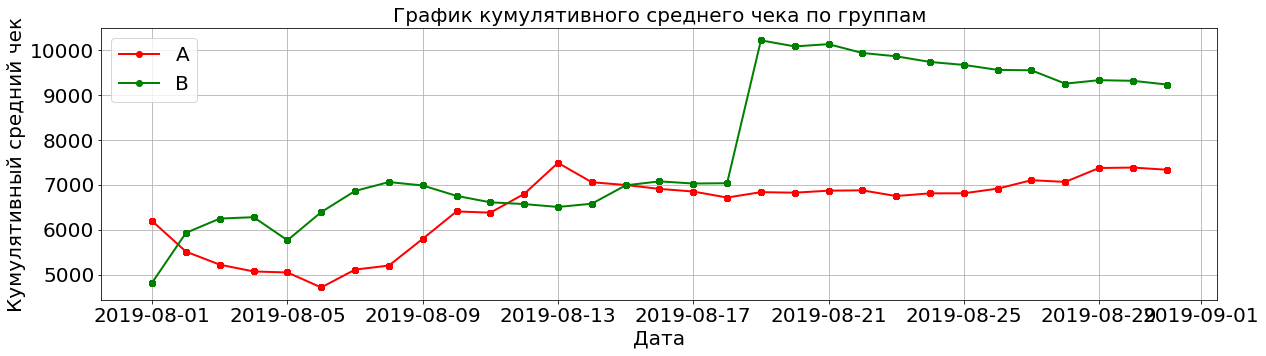

In [39]:
plt.figure(figsize=(20, 5))

# Группа A
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A', color='red', linewidth=2, marker='o')

# Группа B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B', color='green', linewidth=2, marker='o')

# Первый график (кумулятивный средний чек)
plt.title('График кумулятивного среднего чека по группам', fontsize=20)
plt.xlabel('Дата', fontsize=20)
plt.ylabel('Кумулятивный средний чек', fontsize=20)
plt.grid(True)
plt.legend(loc='upper left', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.show()

Исходя из графика, видно, что линии группы B имеет резкий всплеск примерно 18.08, как мы уже увидели в прошлом графике. Линии группы А более равномерна, ее макисмум составляет примерно 7300-7400 по кумулятивному среднему чеку. Несколько раз группа А превосходит группу В, но не на долго. 

Полагаю, что данные по группе B имеют некие аномалии, возможно стоит исследовать больше данных, либо разобраться, откуда взялся резкий скачок в 18-19 числах.

### График относительного изменения кумулятивного среднего чека группы В к группе А

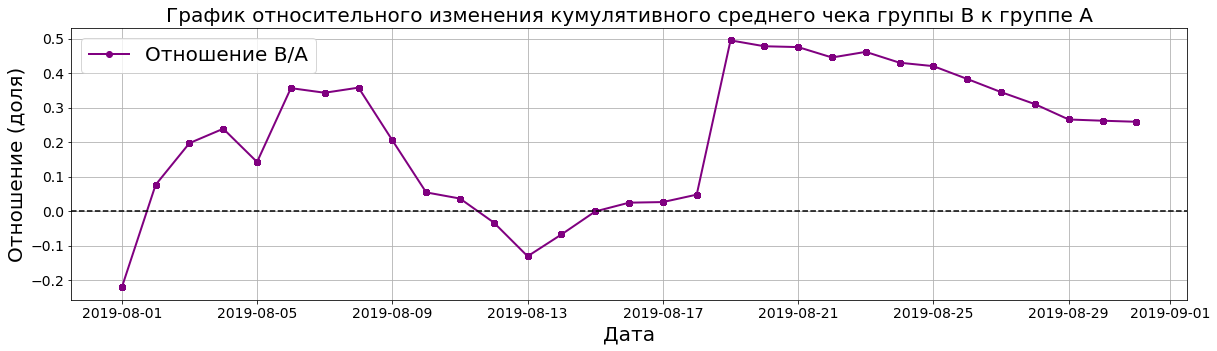

In [41]:
# Готовим данные
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(20, 5))

# Рассчитываем относительное изменение кумулятивного среднего чека группы B к группе A
plt.plot(mergedCumulativeRevenue['date'], 
         (mergedCumulativeRevenue['revenueB'] / mergedCumulativeRevenue['ordersB']) / 
         (mergedCumulativeRevenue['revenueA'] / mergedCumulativeRevenue['ordersA']) - 1, 
         label='Отношение B/A', 
         color='purple',
         linestyle='-', 
         linewidth=2, 
         marker='o')

# Добавляем горизонтальную линию для отметки в 0
plt.axhline(y=0, color='black', linestyle='--')

plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A', fontsize=20)
plt.xlabel('Дата', fontsize=20)
plt.ylabel('Отношение (доля)', fontsize=20)
plt.grid(True)
plt.legend(loc='upper left', fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.show()

Исходя из графика, могу предположить, что выбросы все же имеются. Особенно эт о заметно по скачкам 5-9 и 18-19 чисел. Лучшие показатели наблюдаются 01.08 и 13.08.

### График кумулятивного среднего количества заказов на посетителя по группам

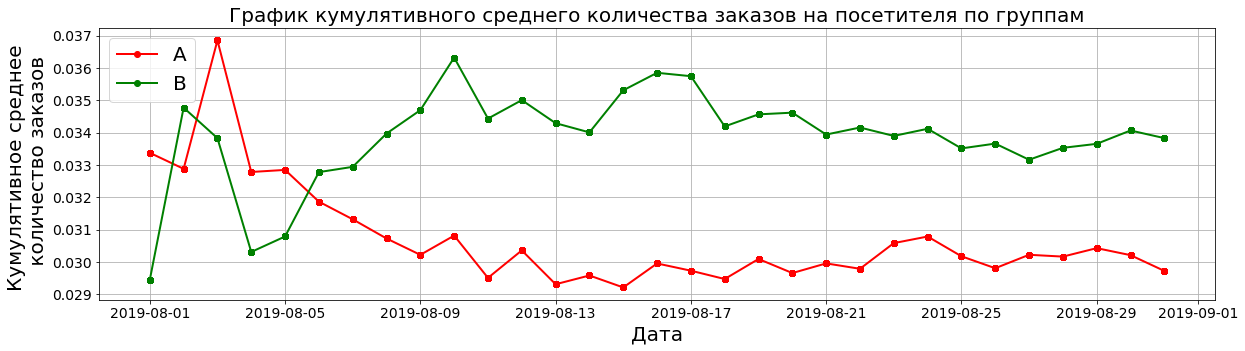

In [43]:
# находим кумулятивную среднего количества заказов на посетителя по группам
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']
# группа A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
# группа B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.figure(figsize=(20, 5))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A', color='red', linewidth=2, marker='o')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B', color='green', linewidth=2, marker='o')
plt.title('График кумулятивного среднего количества заказов на посетителя по группам', fontsize=20)
plt.xlabel('Дата', fontsize=20)
plt.ylabel('Кумулятивное среднее \n количество заказов', fontsize=20)
plt.grid(True)
plt.legend(loc='upper left', fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.show()

Примерно после 1 недели исследования графики начали стабилизироваться, однако всю первую неделю видны сильные колебания у обоих линий. 
В группе А линия графика кумулятивного среднего количества заказов на посетителя по группам очевидно постепенно снижается. В то время как в группе В она то увеличивается, то уменьшается, но все равно находится в основном выше группы А.

### График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе А

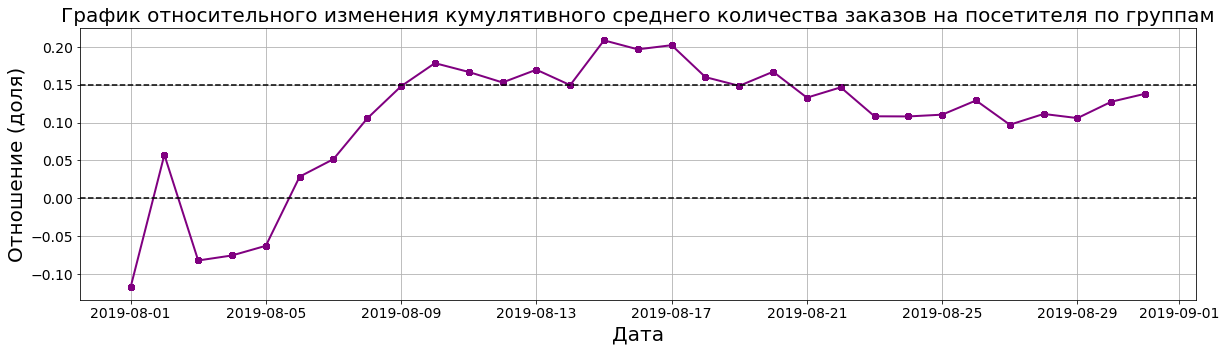

In [44]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], 
                                                                           left_on='date',right_on='date', how='left', suffixes=['A', 'B'])
#строим график
plt.figure(figsize=(20, 5))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, 
         color='purple', linewidth=2, marker='o')
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.15, color='black', linestyle='--')
plt.title('График относительного изменения кумулятивного среднего количества заказов на посетителя по группам', fontsize=20)
plt.xlabel('Дата', fontsize=20)
plt.ylabel('Отношение (доля)', fontsize=20)
plt.grid()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.show()

В первую неделю лидирует группа А. Однако с 6 дня теста группа В начинает стремительно расти, а после 15.08 постепенно стабилизируется. Полагаю, что по данному графику группа В превосходит группу А по конверсии.

### Точечный график количества заказов по пользователям

In [21]:
orders_by_user = orders_new.groupby('visitorId')['transactionId'].nunique()
orders_by_user.sort_values(ascending=False).head(10)

visitorId
3967698036    3
249864742     3
2108163459    3
2988190573    3
3908431265    3
611059232     3
2742574263    3
678354126     2
1404560065    2
1985475298    2
Name: transactionId, dtype: int64

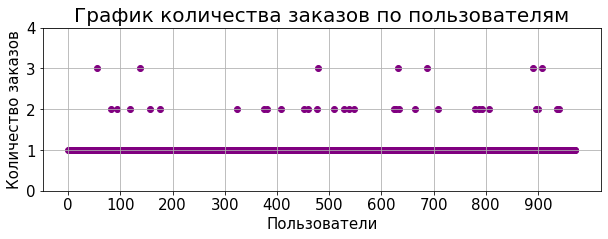

In [45]:
plt.figure(figsize=(10, 3))
plt.scatter(pd.Series(range(0,len(orders_by_user))), orders_by_user,  color='purple')
x_values = pd.Series(range(0, len(orders_by_user)))
plt.title('График количества заказов по пользователям', fontsize=20)
plt.ylabel('Количество заказов', fontsize=15)
plt.xlabel('Пользователи', fontsize=15)
plt.xticks(np.arange(min(x_values), max(x_values), 100), fontsize=15)
plt.yticks(np.arange(0, 5, 1), fontsize=15)
plt.grid()

plt.show()


Так, мы имеем три типа пользователей: с 1, 2 и 3 заказами. С увеличением числа заказов наблюдается уменьшение количества пользователей.

### Расчет 95-го и 99-го перцентилей количества заказов на одного пользователя

In [23]:
# доля пользователей более чем с одним заказом
print('{:.3%}'.format(len(orders_by_user[orders_by_user > 1]) / len(orders_by_user)))

3.700%


Так, мы видим, что пользователей с 2-3 заказами не так уж и много, всего 3,7%. Полагаю, что в данной ситуации их можно считать аномальными.

In [24]:
#посмотри по сырым данным
orders_by_user_2 = orders.groupby('visitorId')['transactionId'].nunique()
orders_by_user_2.sort_values(ascending=False).head(10)

visitorId
4256040402    11
2458001652    11
2378935119     9
2038680547     8
199603092      5
3062433592     5
237748145      5
3803269165     5
1230306981     5
3717692402     5
Name: transactionId, dtype: int64

In [25]:
print('{:.3%}'.format(len(orders_by_user_2[orders_by_user_2 > 1]) / len(orders_by_user_2)))

9.117%


В сырых данных уже гораздо больше пользователей, совершивших более 1 заказа.

In [26]:
print('{:.3%}'.format(len(orders_by_user_2[orders_by_user_2 > 3]) / len(orders_by_user_2)))

1.261%


А вот пользователей, совершивших более 3 заказов крайне мало в исходных данных.

In [27]:
#Расчет 95-го, 97.5 и 99-го перцентилей по очищенным данным
print(np.percentile(orders_by_user, [95, 97.5, 99]))

[1. 2. 2.]


In [28]:
#Расчет 95-го, 97.5 и 99-го перцентилей по сырым данным
print(np.percentile(orders_by_user_2, [95, 97.5, 99]))

[2. 3. 4.]


Будем считать, что граница для определения аномальных пользователей - более 3 заказов. 

### Точечный график стоимостей заказов

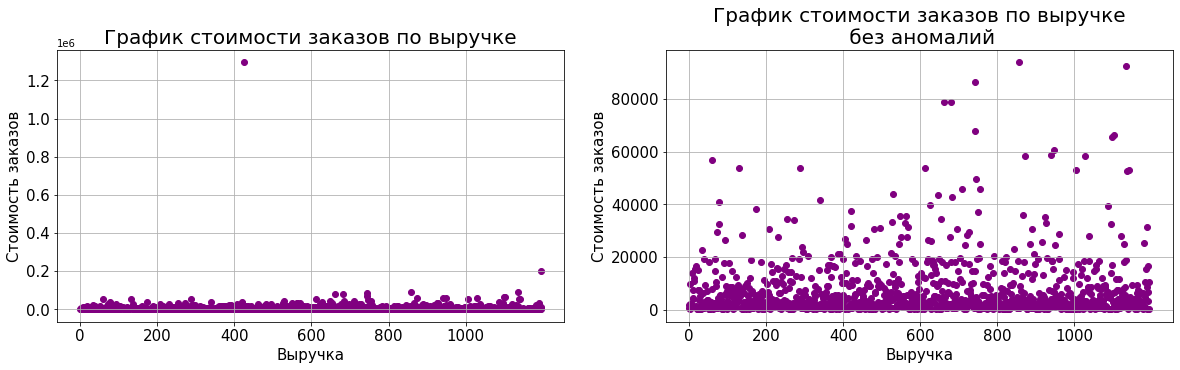

In [50]:
fig = plt.figure(figsize=(20, 5))

ax1 = plt.subplot(1, 2, 1)

x_values = pd.Series(range(0, len(orders['revenue'])))
ax1.scatter(x_values, orders['revenue'], color='purple')

plt.title('График стоимости заказов по выручке', fontsize=20)
plt.ylabel('Стоимость заказов', fontsize=15)
plt.xlabel('Выручка', fontsize=15)

plt.xticks(np.arange(min(x_values), max(x_values), 200))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid()

ax2 = plt.subplot(1, 2, 2, sharex=ax1)

y_values = orders[orders['revenue'] < 100000]['revenue']
x_values = pd.Series(range(0, len(y_values)))

ax2.scatter(x_values, y_values, color='purple')

plt.title('График стоимости заказов по выручке\n без аномалий', fontsize=20)
plt.ylabel('Стоимость заказов', fontsize=15)
plt.xlabel('Выручка', fontsize=15)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid()
plt.show()

На первом графике плохо визуализируются стоимости заказов, поэтому отсекаем верхнюю часть графика, исключив тем самым выбросы, и теперь можем рассмотреть более детально. Самый верхний выброс имел revenue более 200.000. Возможно, это был крайне крупный заказ. Без него картина на правом графике совершенно меняется, можно проследить, что большинство заказов по стоимости не превышают 20.000 руб. 

 ### Расчет 95-го и 99-го перцентилей стоимости заказов 

In [30]:
#по очищенным данным
print(np.percentile(orders_new['revenue'] , [95, 97.5, 99]))

[26785. 37400. 53904.]


In [31]:
#по сырым данным
print(np.percentile(orders['revenue'], [95, 97.5, 99])) 

[28000.  39530.  58233.2]


Так,  не более, чем у 95% пользователей чек дешевле 26 785, также не более, чем у 1% пользователей чек дешевле 53 904. Полагаю, что границей для отсечения в данном случае можно выделить 97.5 перцентиль, то есть отметка в 37400.

### Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным.

H0: различие в среднем количестве заказов на посетителя между группами по "сырым" данным статистически не значимо 

H1:различие в среднем количестве заказов на посетителя между группами по "сырым" данным статистически значимо

alpha = 0.05

Для проверки гипотез будем  использовать тест Манна-Уитни, поскольку он применяется в случаях, когда в данных есть существенные выбросы, которые нельзя исключить (а у нас в сырых данных как раз имеются выбросы). 

In [32]:
visitors_daily_a = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitors_daily_a.columns = ['date', 'visitors_a']

visitors_cum_a = visitors_daily_a.apply(
    lambda x: visitors_daily_a[visitors_daily_a['date'] <= x['date']].agg(
        {'date': 'max', 'visitors_a': 'sum'}
    ),
    axis=1,
)
visitors_cum_a.columns = ['date', 'visitors_cum_a']

visitors_daily_b = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitors_daily_b.columns = ['date', 'visitors_b']

visitors_cum_b = visitors_daily_b.apply(
    lambda x: visitors_daily_b[visitors_daily_b['date'] <= x['date']].agg(
        {'date': 'max', 'visitors_b': 'sum'}
    ),
    axis=1,
)
visitors_cum_b.columns = ['date', 'visitors_cum_b']

orders_daily_a = (
    orders_new[orders_new['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
orders_daily_a.columns = ['date', 'orders_a', 'revenue_a']

orders_cum_a = orders_daily_a.apply(
    lambda x: orders_daily_a[orders_daily_a['date'] <= x['date']].agg(
        {'date': 'max', 'orders_a': 'sum', 'revenue_a': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
orders_cum_a.columns = [
    'date',
    'orders_cum_a',
    'revenue_cum_a',
]

orders_daily_b = (
    orders_new[orders_new['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
orders_daily_b.columns = ['date', 'orders_b', 'revenue_b']

orders_cum_b = orders_daily_b.apply(
    lambda x: orders_daily_b[orders_daily_b['date'] <= x['date']].agg(
        {'date': 'max', 'orders_b': 'sum', 'revenue_b': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
orders_cum_b.columns = [
    'date',
    'orders_cum_b',
    'revenue_cum_b',
]
data = (
    orders_daily_a.merge(
        orders_daily_b, left_on='date', right_on='date', how='left'
    )
    .merge(orders_cum_a, left_on='date', right_on='date', how='left')
    .merge(orders_cum_b, left_on='date', right_on='date', how='left')
    .merge(visitors_daily_a, left_on='date', right_on='date', how='left')
    .merge(visitors_daily_b, left_on='date', right_on='date', how='left')
    .merge(visitors_cum_a, left_on='date', right_on='date', how='left')
    .merge(visitors_cum_b, left_on='date', right_on='date', how='left')
)

ordersByUsersA = (
    orders_new[orders_new['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'transactionId']

ordersByUsersB = (
    orders_new[orders_new['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'transactionId'] 
sampleA = pd.concat([ordersByUsersA['transactionId'],pd.Series(0, index=np.arange(data['visitors_a'].sum() - len(ordersByUsersA['transactionId'])), name='orders')],axis=0)
sampleB = pd.concat([ordersByUsersB['transactionId'],pd.Series(0, index=np.arange(data['visitors_b'].sum() - len(ordersByUsersB['transactionId'])), name='orders')],axis=0)

print('P-value:',"{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))
print('Относительные различия:',"{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

P-value: 0.011
Относительные различия: 0.160


Так, мы видим, что нулевая гипотеза отвергается, поскольку P-value меньше 0.05. В среднем количестве заказов между группами имеются статистически значимые различия. 

Относительный прирост среднего группы В к среднему группы А - 13,8%.

### Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным

H0:Средние чеки групп A и B равны и статистически значимых отличий не имеют

H1:Средние чеки групп A и B различны и статистически значимые отличия имеют

alpha=0.05

Применим тест Манна-Уитни

In [33]:
# Вычисление p-value для теста Манна-Уитни
p_value = stats.mannwhitneyu(orders_new[orders_new['group']=='A']['revenue'], orders_new[orders_new['group']=='B']['revenue'])[1]

# Вычисление относительных различий в средней выручке между группами
relative_difference = orders_new[orders_new['group']=='B']['revenue'].mean()/orders_new[orders_new['group']=='A']['revenue'].mean() - 1
alpha = 0.05
print('P-value: {:.3f}'.format(p_value))
print('Относительные различия: {:.3f}'.format(relative_difference))
if p_value < alpha:
    print('Отвергаем нулевую гипотезу: между долями есть значимая разница')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными') 

P-value: 0.829
Относительные различия: 0.287
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


Так, статистически значимых отличий в среднем чеке между группами нет (P-value > 0.05). А относительное различие среднего чека - 28,7%.

### Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным

**Подготовим очищенные данные:**

В нашем случае аномальными являются пользователи, совершившие более 3 заказов или же пользователи с суммой чека более 37400 руб.

H0: разница в среднем количестве заказов на посетителя между группами по очищенным данным статистически не значима. 

H1: разница в среднем количестве заказов на посетителя между группами по очищенным данным статистически значима. 

alpha=0.05

Применим тест Манна-Уитни

In [34]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['transactionId'] > np.percentile(ordersByUsersA['transactionId'], 97.5)]['visitorId'],
        ordersByUsersB[ordersByUsersB['transactionId'] > np.percentile(ordersByUsersB['transactionId'], 97.5)]['visitorId'],
    ],
    axis=0,
)

usersWithExpensiveOrders = orders_new[orders_new['revenue'] > np.percentile(orders_new['revenue'], 97.5).item()]

abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values(by='revenue')  
)
print(abnormalUsers.head())

       0       date group  revenue  transactionId     visitorId
420  NaN 2019-08-06     B  37550.0   2.788225e+09  1.606766e+09
173  NaN 2019-08-02     B  38160.0   1.192036e+09  2.953427e+09
1087 NaN 2019-08-12     B  39500.0   3.241711e+08  3.590656e+09
78   NaN 2019-08-16     B  40740.0   7.736638e+08  3.288820e+09
339  NaN 2019-08-25     B  41450.0   2.216193e+09  8.347318e+08


In [35]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))
        ]['transactionId'],
        pd.Series(
            0,
            index=np.arange(
                data['visitors_a'].sum() - len(ordersByUsersA['transactionId'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))
        ]['transactionId'],
        pd.Series(
            0,
            index=np.arange(
                data['visitors_b'].sum() - len(ordersByUsersB['transactionId'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 
alpha = 0.05
print('P-value:','{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Относительные различия:','{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

P-value: 0.011
Относительные различия: 0.160


Так, мы видим, что нулевая гипотеза отвергается, поскольку P-value меньше 0.05. В среднем количестве заказов между группами имеются статистически значимые различия.

Относительный прирост среднего группы В к среднему группы А - 16%.

### Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным

H0: разница в среднем чеке заказа между группами по очищенным данным статистически не значима. 

H1: разница в среднем чеке заказа между группами по очищенным данным статистически значима. 

alpha=0.05

Применим тест Манна-Уитни

In [48]:
print('P-value:',
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders_new.loc[
                np.logical_and(
                    orders_new['group'] == 'A',
                    ~orders_new['visitorId'].isin(abnormalUsers),
                ),
                'revenue'
            ],
            orders_new.loc[
                np.logical_and(
                    orders_new['group'] == 'B',
                    ~orders_new['visitorId'].isin(abnormalUsers),
                ),
                'revenue'
            ],
        )[1]
    )
)

print('Относительные различия:',
    "{0:.3f}".format(
        orders_new.loc[
            np.logical_and(
                orders_new['group'] == 'B',
                ~orders_new['visitorId'].isin(abnormalUsers),
            ),
            'revenue'
        ].mean()
        / orders_new.loc[
            np.logical_and(
                orders_new['group'] == 'A',
                ~orders_new['visitorId'].isin(abnormalUsers),
            ),
            'revenue'
        ].mean()
        - 1
    )
)

P-value: 0.829
Относительные различия: 0.287


Так, поскольку p-value>alpha, то не получилось отвергнуть нулевую гипотезу.
Статистически значимых отличий в среднем чеке между группами нет. А относительное различие среднего чека - 1,8%. 

Стоит отметить, что относительные различия уменьшились примерно на 26%, что говорит о правильности исключения аномалий.

## Итоги

В ходе анализа A/B теста было определено:

- статистически значимая разница в среднем количестве заказов на посетителя между группами и по очищенным, и по сырым данным **есть**.
- статистически значимой разницы в среднем чеке заказа между группами по сырым и очищенным данным **нет**
- график различия среднего количества заказов на посетителя между группами показывает, что результаты группы B лучше, чем у группы A.
- график различия среднего чека показывает, что результаты группы B лучше, чем у группы А.

**Таким образом, можем остановить тест, поскольку уже четко видно, что группа B превзошла группу A по большинству показателей. Вряд ли в дальнейшем что-то изменится, ведь все графики к концу исследования уже начинали постепенно стабилизироваться.**
